# **Memory models**

### **Pimsleur (1967)**

**Fixed review schedule for all items with exponentially increasing intervals**

-> "graduated interval recall"

In [1]:
num_levels = 10
intervals = [5 ** i for i in range(num_levels)]

print(f"intervals = {intervals}")

num_exercises = 10

class Student:
    def __init__(self, name):
        self.name = name
        self.levels = [0] * num_exercises

def change_level(student, exercise):
    if student.levels[exercise] < num_levels - 1:
        student.levels[exercise] += 1  # else skip
        
s = Student("max_muster")


print(f"{'-'*30}", s.levels, f"{'-'*30}", sep="\n")
change_level(s, 0)
change_level(s, 1)
change_level(s, 2)
change_level(s, 2)
print(s.levels, end="\n"*3)

print("Repetition intervals for each exercise for student s:")
print([intervals[i] for i in s.levels])

intervals = [1, 5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125]
------------------------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
------------------------------
[1, 1, 2, 0, 0, 0, 0, 0, 0, 0]


Repetition intervals for each exercise for student s:
[5, 5, 25, 1, 1, 1, 1, 1, 1, 1]


 <br><br><br>

### **Leitner (1972)**

**Spaced repetition algorithm based on performance levels**

-> multiple levels with different repetition frequencies; an item (word, error type, ...) moves up a level if it has been answered correctly and moves down (!) a level if it has been answered incorrectly

-> repetition frequencies are doubled from level $i$ to level $i+1\:$ $\Rightarrow$ $\,$ [1, 2, 4, 8, 16, ...]

<img src="./images/leitner.png" width=400 align="left"/>

In [2]:
num_levels = 10
intervals = [2**i for i in range(num_levels)]

print(f"intervals = {intervals}")

num_exercises = 10

class Student:
    def __init__(self, name):
        self.name = name
        self.levels = [0] * num_exercises

def change_level(student, exercise, success):
    if success:
        if student.levels[exercise] < num_levels - 1:
            student.levels[exercise] += 1
    else:
        if student.levels[exercise] > 0:
            student.levels[exercise] -=1

s = Student("max_muster")


print(f"{'-'*30}", s.levels, f"{'-'*30}", sep="\n")
change_level(s, 0, 1)
change_level(s, 1, 1)
change_level(s, 2, 1)
change_level(s, 2, 1)
print(s.levels, end="\n"*3)

print("Repetition intervals for each exercise for student s:")
print([intervals[i] for i in s.levels])

intervals = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
------------------------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
------------------------------
[1, 1, 2, 0, 0, 0, 0, 0, 0, 0]


Repetition intervals for each exercise for student s:
[2, 2, 4, 1, 1, 1, 1, 1, 1, 1]


 <br><br><br>

### **DASH (2016)**

**Modeling the temporal dynamics of a learner's knowledge state**

-> DASH (difficulty, ability, study history) is a domain independent approach applicable to areas of knowledge with separable components or items

-> Assumption: Knowledge state is jointly dependent on 1) item's latent difficulty, 2) student's latent ability, 3) characteristics of past study
<br><br>

**DASH predicts the likelihood of student $s$ making a correct response on the $k$-th trial for item $i$, conditioned on that student-item's specific study history**
<br><br>

**Intuition:** High ability of a student increases and high difficulty of an item decreases the probability of a correct response, memory traces are modeled with a sum over time 
windows, log is used to model the dimnishing benefit of additional study
<br>

$P(R_{sik} = 1 \, | \, a_s, d_i, t_{1:k}, r_{1:k-1}, \theta) = \sigma(a_s - d_i + h_\theta (t_{s,i,1:k}, r_{s,i,1:k-1}))$

with $\: \sigma(x) = \frac{1}{1 + e^{-x}}, \: a_s =$ latent ability of student$, \: d_i =$ latent difficulty of item$, \: t_{1:k} =$ start times of trials$, \: r_{1:k-1} =$ binary response accuracies of trials$, \: h_\theta =$ effect of study history

-> $a_s$ and $d_i$ are latent features motivated by collaborative filtering (matrix factorization, encoders), $h_\theta$ is motivated by models of human memory

-> $h_\theta = \sum_{w=1}^W \theta_{2w-1} \text{log}(1 + c_{siw}) + \theta_{2w} \text{log}(1 + n_{siw})$

with $w \in \{1,...,W\} =$ index of time windows (via $t_{1:k}$)$, \: c_{siw} =$ number of  times a student $s$ correctly recalled item $i$ in window $w$ out of $n_{siw}$ attempts$, \: \theta =$ window-specific weights ((8))

<br>
How to select review material? $\,$ -> prioritize items that are on the verge of being forgotten ($p \approx 0.5$ $\, → \,$  "desirable difficulty")
<br><br>
How to estimate parameters? $\,$ ...

 <br><br><br>

### **HLR (2016)**

**Estimate the half-life of a word or concept, i.e. the time when a student is on the verge of forgetting**

HLR (half-life regression) is based on the assumption of memory decaying exponentially and repeated exposure increasing half-life of an item exponentially
<br>

-> $p = 2^{-\Delta/h}$, $p =$ probability of correctly recalling an item, $\Delta =$ (lag) time since the item was last practiced, $h =$ half-life or measure of strength in the learner's long-term memory $\,$ -> $p = 0.5\,$ if $\,\Delta = h$

Note: $p$ is measured as the proportion of times an item is recalled correctly in a particular session
<br>

How do we estimate the half-life $\hat{h}_\Theta?$

-> $\hat{h}_\Theta = 2^{\Theta \cdot x}$, $\:x =$ feature vector that summarizes a student's previous exposure (right, wrong, bias, lexemes), $\Theta =$ weight vector

<img src="./images/learning_trace.png" width=500 align="left"/>

 (Graph above: $y$-axis = % of correct responses in one training session, $x$-axis: lag time in days)

Note: Pimsleur and Leitner are special cases of HLR

**Pimsleur:** $\:\Theta = \{x_n \to \text{log}_2(5)\}$ where $x_n$ is the number of practices  (+ error in paper)

$0.5 = 2^{-\Delta / \hat{h}_\Theta} \Rightarrow \text{log}_2(0.5) = -\Delta \,/\, 2^{\Theta \cdot x} \Rightarrow \Theta \cdot x = \text{log}_2(- \Delta \,/\, \text{log}_2(0.5)) \Rightarrow \Theta_1 \cdot x_n = \text{log}_2(-\Delta \,/\, \text{log}_2(0.5))$

or $\Delta = -\text{log}_2(0.5) \cdot 2^{\Theta \cdot x}$ $\,$ ->$\hspace{0.1em}$ e.g. $\,125 = -\text{log}_2(0.5) \cdot 2^{\text{log}_2(5) \cdot 3}$

**Leitner:** $\:\Theta = \{x_\oplus \to 1, \, x_\ominus \to -1\},$ where $x_\oplus$ is the number of past correct responses and $x_\ominus$ is the number of past incorrect responses

$0.5 = 2^{-\Delta / \hat{h}_\Theta} \Rightarrow \text{log}_2(0.5) = -\Delta \,/\, 2^{\Theta \cdot x} \Rightarrow \Theta \cdot x = \text{log}_2(- \Delta \,/\, \text{log}_2(0.5)) \Rightarrow \Theta_1 - \Theta_2 = \text{log}_2(- \Delta \,/\, \text{log}_2(0.5))$

or $\Delta = -\text{log}_2(0.5) \cdot 2^{\Theta \cdot x}$ $\,$ ->$\hspace{0.1em}$ e.g. $\,8 = -\text{log}_2(0.5) \cdot 2^3$ <br><br>

What is the feature vector $x$? $\,$ -> #attempts, #correct attempts, bias, lexeme-tag (identifier)

Note: The weights are optimized over all students, that is to say for every student the same weights are used <br><br>

How to learn $\Theta$? $\,$ -> L2-based loss function, training with gradient descent (AdaGrad)

$\ell(\langle p, \Delta, \text{fv} \rangle, \Theta) = (p - \hat{p}_\Theta)^2 + \alpha \, (h - \hat{h}_\Theta)^2 + \lambda \, \lVert \Theta \rVert_2^2$ $\,$ with $\,h = \frac{-\Delta}{\text{log}_2(p)}$

$\frac{\partial (p - \hat{p}_\Theta)^2}{\partial \theta_k} = 2 \, (p - \hat{p}_\Theta) \, \text{ln}^2(2) \, \hat{p}_\Theta \, \frac{\Delta}{\hat{h}_\Theta} \, x_k$

$\frac{\partial (h - \hat{h}_\Theta)^2}{\partial \theta_k} = 2 \, (\hat{h}_\Theta + \frac{\Delta}{\text{log}_2(p)}) \, \text{ln}(2) \, \hat{h}_\Theta \, x_k$

$\frac{\partial (\lVert \Theta \rVert_2^2)}{\partial \theta_k} = 2 \, \theta_k$ <br><br>

What data is used: 13 million student-item sessions (probability $p$, lag time $\Delta$, item identifier, from-to language, timestamp, ...)

 <br><br><br>

**MAE (mean absolute error) scores**: (trained and evaluated on duolingo data)

**hlr_100000** $\Rightarrow$ 0.351, **hlr_1000000** $\Rightarrow$ 0.124, hlr_total ($\approx$ 13 $\cdot$ 10$^6$) $\Rightarrow$ 0.129 <br>
**hlr_l** $\Rightarrow$ 0.129 <br>
**hlr_b_l** $\Rightarrow$ 0.532 **[¬]** <br>
**hlr_l_rw** $\Rightarrow$ 0.129 <br>
**leitner** $\Rightarrow$ 0.235 <br>
**pimsleur** $\Rightarrow$ 0.142 <br>
**lr_l** $\Rightarrow$ 0.219 <br>
**lr_b_l** $\Rightarrow$ 0.228 <br>
**lr_l_rw** $\Rightarrow$ 0.293 <br>
**constant_mean** $\Rightarrow$ 0.199 <br>
**constant_1** $\Rightarrow$  0.105 **[!]**

**Weights:** (trained and evaluated on duolingo data, $\;$ -l => no lexemes, -b => no bias, -rw => no right&wrong counts, lr => linear regression model)

**hlr:** right_w = 0.0043, wrong_w = -0.1840, bias = 7.3372, ... <br>
**hlr -l:** right_w = -0.012, wrong_w = -0.2234, bias = 7.5264 <br>
**hlr -b -l:** right_w = -0.1489, wrong_w = -0.6975 [¬] <br>
**hlr -l -rw:** bias = 7.2078 <br>
**lr -l**: right_w = 0.347, wrong_w = 0.1532, time = 0.0073, bias = 0.3289 <br>
**lr -b -l:** right_w = 0.416, wrong_w = 0.2043, time = 0.0075 <br>
**lr -l -rw:** time = 0.0192, bias = 0.851

In [2]:
import math
import matplotlib.pyplot as plt

# weights calculated with duolingo data

def hlr_l(lag_time, right, wrong):  # lag time in days
    right = math.sqrt(1 + right)
    wrong = math.sqrt(1 + wrong)
    return 2 ** (-lag_time / 2 ** (-0.012 * right + -0.2234 * wrong + 7.5264))

"""
def hlr_b_l():
    pass  # [¬]
"""

def hlr_l_rw(lag_time, right, wrong):
    return 2 ** (-lag_time / 2 ** 7.2078)

def leitner(lag_time, right, wrong):
    try:
        return 2 ** (-lag_time / 2 ** (right - wrong))
    except OverflowError:
        return 1

def leitner_2(lag_time, right, wrong):  # v2
    right = math.sqrt(1 + right)
    wrong = math.sqrt(1 + wrong)
    try:
        return 2 ** (-lag_time / 2 ** (right - wrong))
    except OverflowError:
        return 1
    
def pimsleur(lag_time, right, wrong):
    try:
        return 2 ** (-lag_time / (2 ** math.log(5, 2)) ** (right + wrong))
    except OverflowError:
        return 1

def lr_l(lag_time, right, wrong):
    right = math.sqrt(1 + right)
    wrong = math.sqrt(1 + wrong)
    return 1 / (1 + math.exp(-(0.347 * right + 0.1532 * wrong + 0.0073 * lag_time + 0.3289)))

def lr_b_l(lag_time, right, wrong):
    right = math.sqrt(1 + right)
    wrong = math.sqrt(1 + wrong)
    return 1 / (1 + math.exp(-(0.416 * right + 0.2043 * wrong + 0.0075 * lag_time)))

def lr_l_rw(lag_time, right, wrong):
    return 1 / (1 + math.exp(-(lag_time * 0.0192 + 0.851)))

def constant_mean(lag_time, right, wrong):
    return 0.859

def constant_1(lag_time, right, wrong):
    return 1

In [3]:
def plot_memory_models_for_r_w(r_s, w_s, functions_to_plot, titles):
    p_values_functions = [[[] for _ in range(len(r_s))] for _ in range(len(functions_to_plot))]  # _ => j] _ => i
    days = list(range(101))
    for i in range(len(functions_to_plot)):
        for j, (r, w) in enumerate(zip(r_s, w_s)):
            for d in range(101):  # days
                p_values_functions[i][j].append(functions_to_plot[i](d, r, w))

    plt.figure(figsize=(24, 5))
    prefix = 100 + 10 * len(p_values_functions)
    legends = []
    for r, w in zip(r_s, w_s):
        res = r"$x_\oplus$" + f" = {r}, "
        # res += " " * (15 - len(res))
        res += r"$x_\ominus$" + f" = {w}"
        legends.append(res)
    for i in range(len(p_values_functions)):
        plt.subplot(prefix + i + 1)
        plt.title(titles[i][0], fontdict=titles[i][1])
        plt.xlabel("lag time in days")
        plt.xlim(0, 100)
        plt.xticks(range(0, 101, 10))
        plt.ylabel("predicted probability p")
        plt.ylim(0, 1)
        plt.yticks([v / 10 for v in range(0, 11, 1)])
        for j in range(len(p_values_functions[i])):
            plt.plot(days, p_values_functions[i][j])
        plt.legend(legends, loc="upper right")
    
    plt.show()

In [4]:
def plot_memory_model_for_r_w(r_s, w_s, function_to_plot, title):
    p_values_function = [[] for _ in range(len(r_s))]  # _ => j] _ => i
    days = list(range(0, 101, 0.1))
    for j, (r, w) in enumerate(zip(r_s, w_s)):
        for d in range(101):  # days
            p_values_function[j].append(function_to_plot(d, r, w))

    plt.figure(figsize=(12, 5))
    # prefix = 100 + 10 * len(p_values_functions)
    legends = []
    for r, w in zip(r_s, w_s):
        res = r"$x_\oplus$" + f" = {r}, "
        res += r"$x_\ominus$" + f" = {w}"
        legends.append(res)
    # plt.title(title[0], fontdict=title[1])
    plt.xlabel("lag time in days")
    plt.xlim(0, 100)
    plt.xticks(range(0, 101, 10))
    plt.ylabel("memory retention probability" + r"$p$")
    plt.ylim(0, 1)
    plt.yticks([v / 10 for v in range(0, 11, 1)])
    for j in range(len(p_values_function)):
        plt.plot(days, p_values_function[j])
    plt.legend(legends, loc="upper right")

    plt.show()

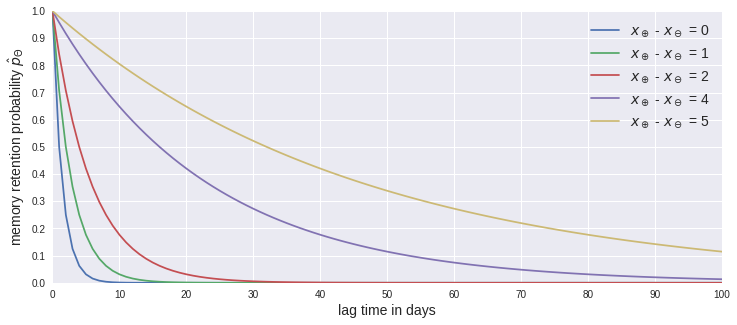

In [5]:
r_s = [0,1,2,4,5]
w_s = [0,0,0,0,0]
d = {"fontsize": 14, "fontweight": "bold"} 
t = ["", d]
function_to_plot = leitner
p_values_function = [[] for _ in range(len(r_s))]  # _ => j] _ => i
days = list(range(101))
for j, (r, w) in enumerate(zip(r_s, w_s)):
    for d in range(101):  # days
        p_values_function[j].append(function_to_plot(d, r, w))
            
plt.figure(figsize=(12, 5))
plt.style.use("seaborn")
# prefix = 100 + 10 * len(p_values_functions)
legends = []
for r, w in zip(r_s, w_s):
    res = r"$x_\oplus$ - $x_\ominus$" + f" = {r}"
    legends.append(res)
plt.xlabel("lag time in days", fontsize=14)
plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))
plt.ylabel("memory retention probability " + r"$\hat{p}_\Theta$", fontsize=14)
plt.ylim(0, 1)
plt.yticks([v / 10 for v in range(0, 11, 1)])
for j in range(len(p_values_function)):
    plt.plot(days, p_values_function[j])
plt.legend(legends, loc="upper right", fontsize=14)
# plt.savefig("leitner_graph.png", dpi=1000, transparent=False)
plt.show()

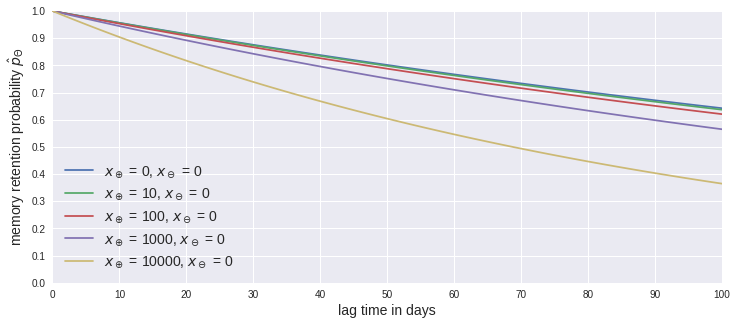

In [7]:
r_s = [0,10,100,1000,10000]
w_s = [0,0,0,0,0]
d = {"fontsize": 13, "fontweight": "bold"} 
t = ["", d]
function_to_plot = hlr_l
p_values_function = [[] for _ in range(len(r_s))]  # _ => j] _ => i
days = list(range(101))
for j, (r, w) in enumerate(zip(r_s, w_s)):
    for d in range(101):  # days
        p_values_function[j].append(function_to_plot(d, r, w))
            
plt.figure(figsize=(12, 5))
plt.style.use("seaborn")
# prefix = 100 + 10 * len(p_values_functions)
legends = []
for r, w in zip(r_s, w_s):
    res = r"$x_\oplus$" + f" = {r}, "
    res += r"$x_\ominus$" + f" = {w}"
    legends.append(res)
plt.xlabel("lag time in days", fontsize=14)
plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))
plt.ylabel("memory retention probability " + r"$\hat{p}_\Theta$", fontsize=14)
plt.ylim(0, 1)
plt.yticks([v / 10 for v in range(0, 11, 1)])
for j in range(len(p_values_function)):
    plt.plot(days, p_values_function[j])
plt.legend(legends, loc="lower left", fontsize=14)  # loc=(0.07, 0.03)
# plt.savefig("hlr_plus.png", dpi=1000, transparent=False)
plt.show()

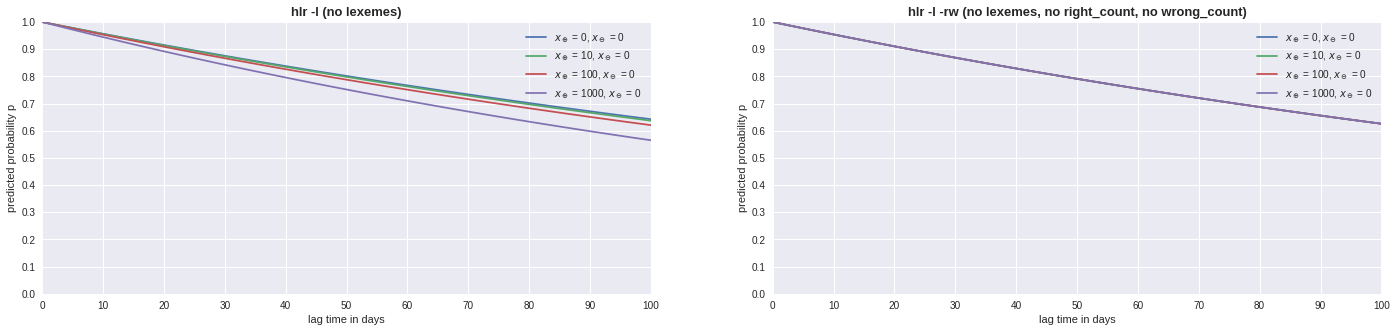

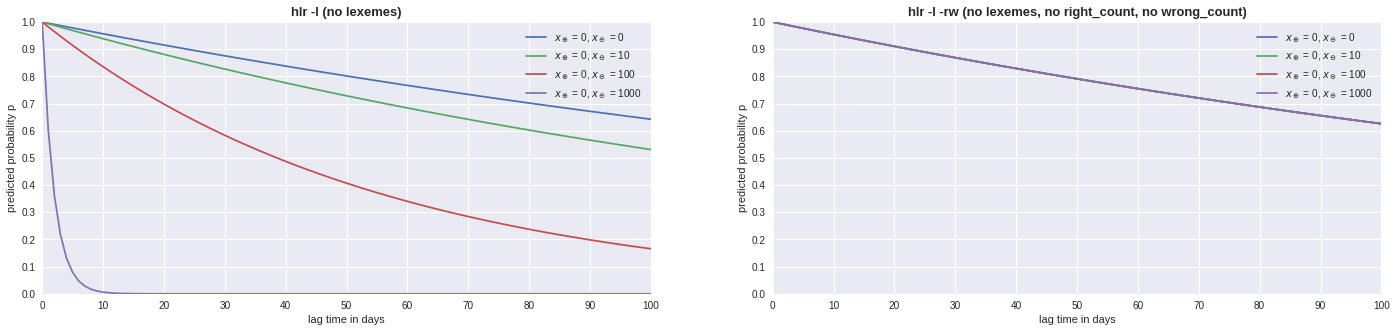

In [11]:
# hlr
d = {"fontsize": 13, "fontweight": "bold"}
t = [["hlr -l (no lexemes)", d], ["hlr -l -rw (no lexemes, no right_count, no wrong_count)", d]]
plot_memory_models_for_r_w([0, 10, 100, 1000], [0, 0, 0, 0], [hlr_l, hlr_l_rw], t)
plot_memory_models_for_r_w([0, 0, 0, 0], [0, 10, 100, 1000], [hlr_l, hlr_l_rw], t)

#### **HLR:**
- in terms of MAE performance, there is virtually no difference between hlr -l and hlr -l -rw
- since right_weight and wrong_weight are both negative, studying (good or bad) leads to shorter half-life predictions for hlr -l
- lag time decreases the predicted half life <br><br><br>

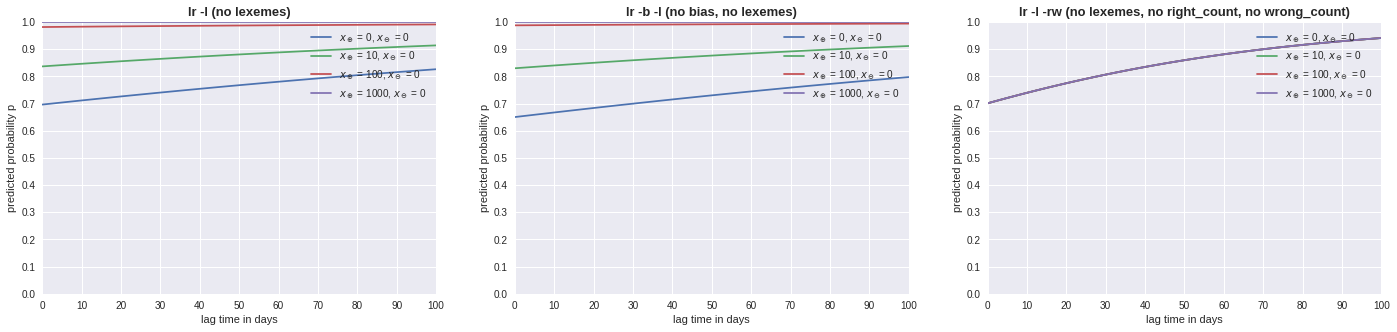

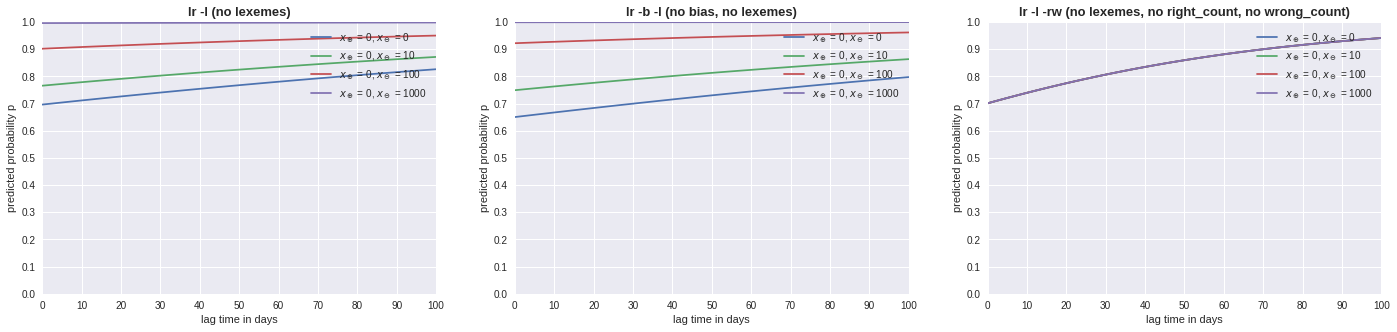

In [26]:
# lr
d = {"fontsize": 13, "fontweight": "bold"} 
t = [["lr -l (no lexemes)", d], ["lr -b -l (no bias, no lexemes)", d], ["lr -l -rw (no lexemes, no right_count, no wrong_count)", d]]
plot_memory_models_for_r_w([0, 10, 100, 1000], [0, 0, 0, 0], [lr_l, lr_b_l, lr_l_rw], t)
plot_memory_models_for_r_w([0, 0, 0, 0], [0, 10, 100, 1000], [lr_l, lr_b_l, lr_l_rw], t)

#### **LR:**
- in terms of MAE performance, lr -l and lr -b -l perform similarly,  lr -l -rw performs worse
- since right_weight and wrong_weight are both positive, studying (good or bad) leads to longer half-life predictions for lr -l and lr -b -l
- lag time increases the predicted half-life instead of decreasing it <br><br><br>

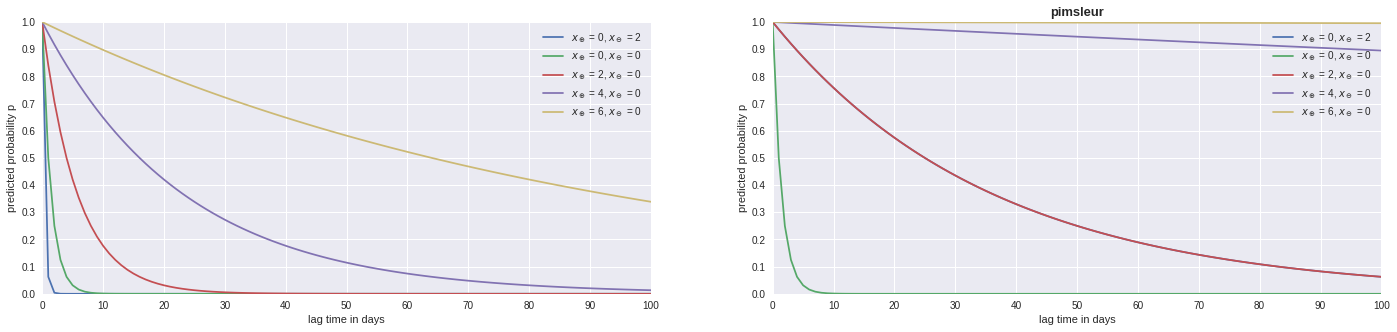

In [27]:
# leitner, pimsleur
d = {"fontsize": 13, "fontweight": "bold"} 
t = [["", d], ["pimsleur", d], ["constant", d]]
plot_memory_models_for_r_w([0, 0, 2, 4, 6], [2, 0, 0, 0, 0], [leitner, pimsleur], t)
# plot_memory_models_for_r_w([0, 0, 0, 0], [0, 2, 4, 6], [leitner, pimsleur], t)

#### **Leitner, Pimsleur:**
- in terms of MAE performance, leitner performs worse than pimsleur
- both leitner and pimsleur react strongly to even small changes to right_count, wrong_count (=> calibrate initial time step)
- leitner increases the predicted half-life for increasing right_count and decreases the predicted half-life for increasing wrong_count, pimsleur increases the predicted half-life equally for both of them
- lag time decreases the predicted half-life <br><br><br>

#### **Analysis of results**:

- Since it is not possible to directly measure the probability of remembering a word or concept (either one remembers or one doesn't), we measure $\frac{\text{correct usages}}{\text{total usages}}$ of a word or concept in a given session. <br>
$\Rightarrow$ There are obvious flaws with this method, since all uses after the first one (of a session) are much more likely to be correct. <br>
$\Rightarrow$ $\frac{\text{correct usages}}{\text{total usages}}$ = 1 is the most frequenct case, so most "successful" methods just predict a high probability (just predicting p = 1 actually beats HLR in the MAE metric). <br><br>

- HLR has some sensible properties (e.g. (exponential) decrease of half-life over time (in-built)), but due to the measuring method some of its ideas (e.g. (exponential) increase of half-life with repeated exposure (right_count, wrong_count)) are not found in the trained model. <br><br>

$\Rightarrow$ Using this measuring method in the context of word learning, HLR doesn't actually predict what it is supposed to predict; otherwise, it should be able to beat the constant prediction p = 1. <br>

$\Rightarrow$ Words can easily be remembered for some minutes (as shown by the predicted high probabilities (duolingo data)), but applying a concept (e.g. comma usage) can stay challenging even when an exercise pertaining to the same concept has just been solved (making the measuring method a potentially valid choice). This however is somewhat opposed to HLR's assumption that p = 1 if lag time = 0. <br><br>

Under the duolingo data, HLR has fallen short of achieving all its intended properties. We try to use simulated student data to test if HLR can achieve these missing properties, namely the exponential increase of half-life with repeated exposure combined with the learning of concept-specific weights (correctly identifying hard and easy concepts).

<br><br>

$\Rightarrow$ The binomial distribution is used to simulate student performance during a session. The probability p to solve a single exercise (of a session) correctly is a function of lag time, right_count, wrong_count, the error class (concept-specific weights), bias, and some added noise (iq):

In [28]:
# patchwork

def hlr_s_iq0(lag_time, right, wrong, error_class=0, iq=0):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq))

def hlr_s_iq3(lag_time, right, wrong, error_class=0, iq=3):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq ))

def hlr_s_iq5(lag_time, right, wrong, error_class=0, iq=5):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq ))

def hlr_s_h_iq0(lag_time, right, wrong, error_class=28, iq=0):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq ))

def hlr_s_h_iq3(lag_time, right, wrong, error_class=28, iq=3):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq))

def hlr_s_h_iq5(lag_time, right, wrong, error_class=28, iq=5):
    return 2 ** (-lag_time / 2 ** (0.1 * right + 0.05 * wrong - 0.2 * error_class + 0.5 + 0.1 * iq))

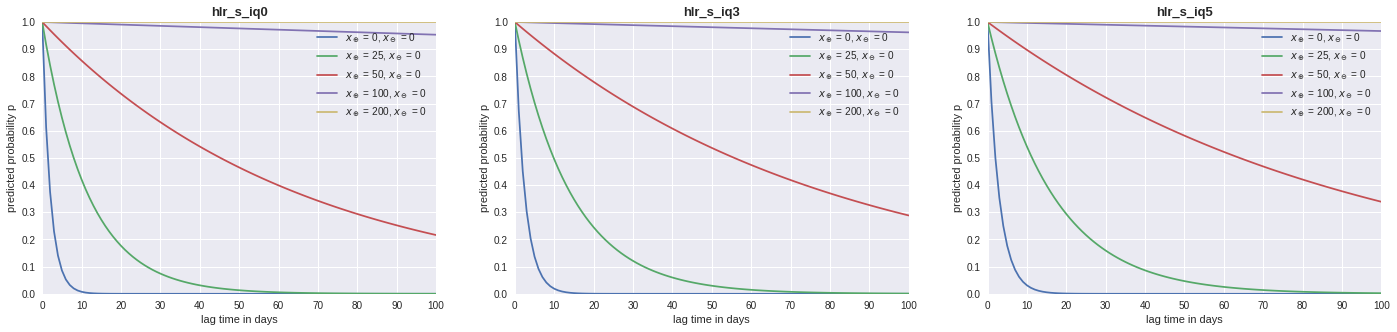

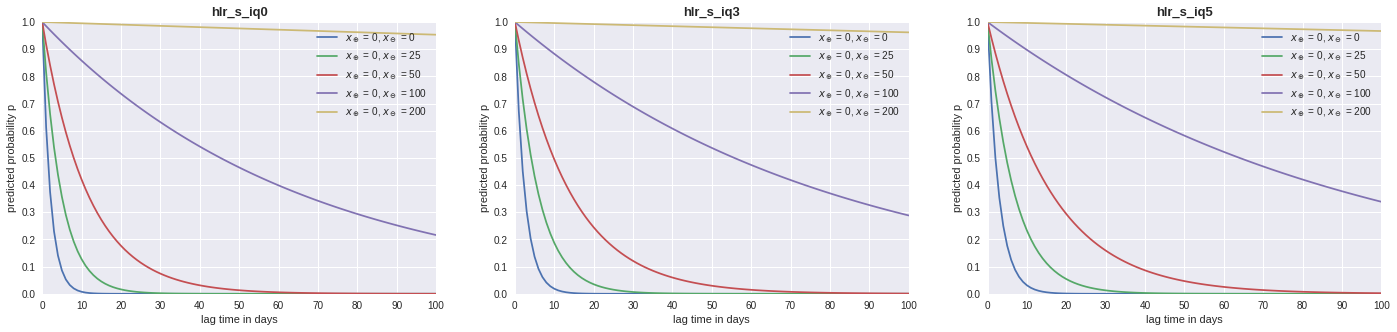

In [29]:
d = {"fontsize": 13, "fontweight": "bold"}
t = [["hlr_s_iq0", d], ["hlr_s_iq3", d], ["hlr_s_iq5", d]]
plot_memory_models_for_r_w([0, 25, 50, 100, 200], [0, 0, 0, 0, 0], [hlr_s_iq0, hlr_s_iq3, hlr_s_iq5], t)
plot_memory_models_for_r_w([0, 0, 0, 0, 0], [0, 25, 50, 100, 200], [hlr_s_iq0, hlr_s_iq3, hlr_s_iq5], t)

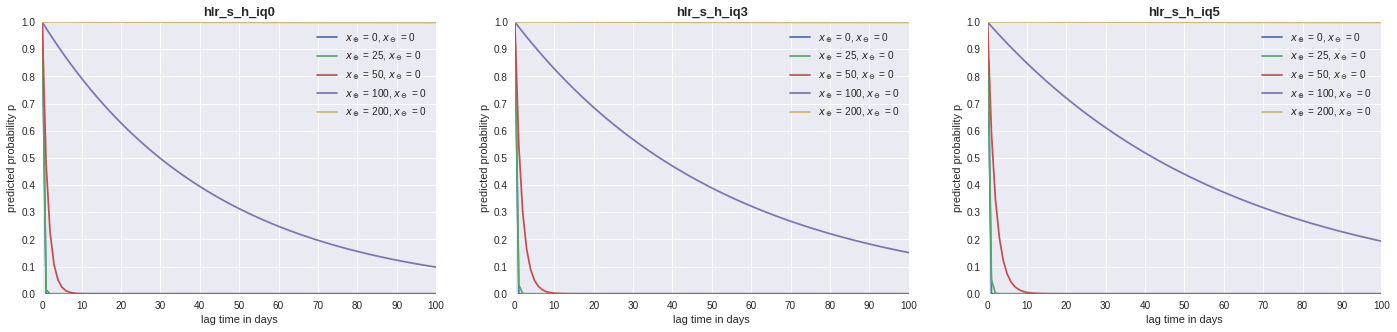

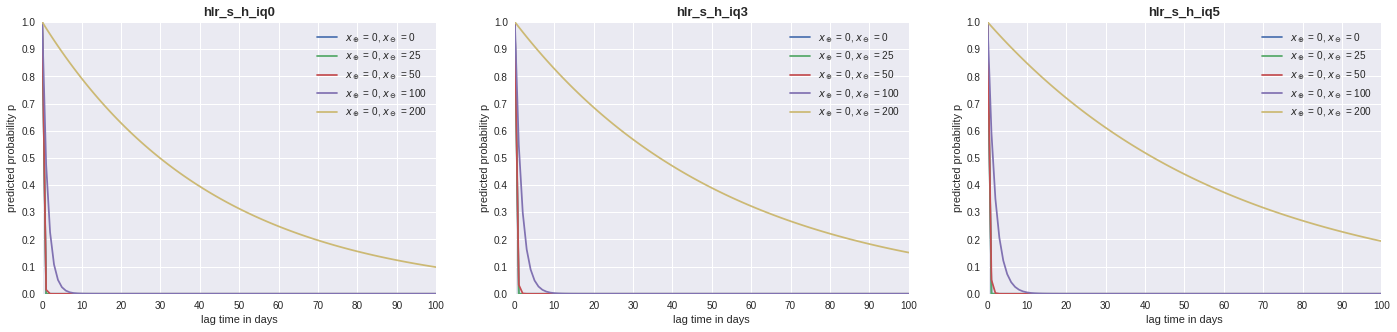

In [30]:
t = [["hlr_s_h_iq0", d], ["hlr_s_h_iq3", d], ["hlr_s_h_iq5", d]]
plot_memory_models_for_r_w([0, 25, 50, 100, 200], [0, 0, 0, 0, 0], [hlr_s_h_iq0, hlr_s_h_iq3, hlr_s_h_iq5], t)
plot_memory_models_for_r_w([0, 0, 0, 0, 0], [0, 25, 50, 100, 200], [hlr_s_h_iq0, hlr_s_h_iq3, hlr_s_h_iq5], t)

Simulating good student data is tricky. Without some kind of dimnishing effect of additional study (right, wrong), the student tends to either go towards always solving all exercises or always failing all exercises (in our case always solving all exercises). This is, to a certain degree, also an issue with HLR itself $(\pm)$. <br>

$\Rightarrow$ Still, HLR managed to learn to following weights from our simulated data (training set with $\approx$ 5$\cdot$10$^6$ sessions, test set with $\approx$ 5$\cdot$10$^5$ sessions):

(code => t_tempora.py file)

- **right: 0.02188** $\,$ (true_right = 0.1) 
- **wrong: 0.0502** $\,$ (true_wrong = 0.05)
- **bias: 1.4856** $\,$ (true_bias = 0.5)

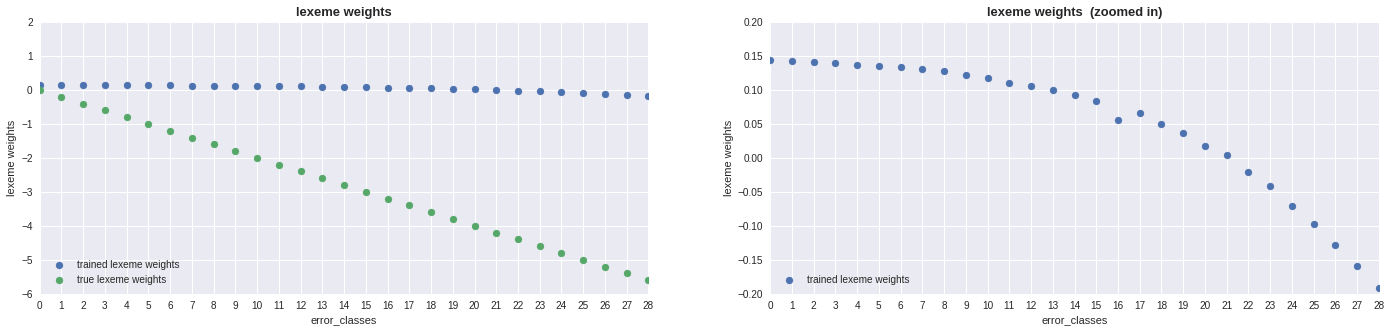

In [31]:
lexemes = list({0: 0.0218835634775376, 1: 0.05023817044514919, 2: 1.48563765360792, 3: 0.14374467098924273, 4: 0.14216593950828124, 5: 0.14104995564173028, 6: 0.13949024024254283, 7: 0.13697910828312446, 8: 0.13458017221996618, 9: 0.1332743242452488, 10: 0.1306384489450216, 11: 0.12751409074790923, 12: 0.12188301151760755, 13: 0.117026279941521, 14: 0.11058791768768982, 15: 0.10613711005424054, 16: 0.10055480397329788, 17: 0.09274962295689836, 18: 0.08406376504714105, 19: 0.056042873799943736, 20: 0.06564320313999333, 21: 0.050530225941619475, 22: 0.03726611240072047, 23: 0.017906025943231808, 24: 0.004344823360840011, 25: -0.020525107808471606, 26: -0.04192053066450339, 27: -0.07145175146747697, 28: -0.09669483421057429, 29: -0.1279756627240078, 30: -0.15904212775417667, 31: -0.19092505835084733}.values())[3:]
true_lexemes = [-0.2 * error_class for error_class in range(29)]  # num of error classes

plt.figure(figsize=(24, 5))

plt.subplot(121)

plt.title("lexeme weights", {"fontsize": 13, "fontweight": "bold"})
plt.xlabel("error_classes")
plt.xlim(0, 28)
plt.xticks(range(29))
plt.ylabel("lexeme weights")
plt.ylim(-6, 2)
plt.scatter(range(29), lexemes)
plt.scatter(range(29), true_lexemes)
plt.legend(["trained lexeme weights", "true lexeme weights"], loc="lower left")

plt.subplot(122)

plt.title("lexeme weights  (zoomed in)", {"fontsize": 13, "fontweight": "bold"})
plt.xlabel("error_classes")
plt.xlim(0, 28)
plt.xticks(range(29))
plt.ylabel("lexeme weights")
plt.ylim(-0.2, 0.2)
plt.scatter(range(29), lexemes)
plt.legend(["trained lexeme weights"], loc="lower left")


$\Rightarrow$ The weights are quite different, but the order is mostly correct. The lexeme weights play a more significant role at the beginning, when right_count and wrong_count are low. Later on, they only influence the predicted probability very slightly, so their values remain within a narrower range. <br><br>

#### **Conclusion**:

- The measuring method for p is crucial. The use of HLR for (mostly) word learning is problematic. The use of HLR for concept learning seems more promising, but there are issues as well (e.g. p = 1 if lag time = 0). <br>

- HLR is a simple model with some sensible properties. However, HLR either starts to break down for more extreme values (big counts) or just learns to ignore them.

$\Rightarrow$ HLR can perfectly imitate the Leitner method, but other than that it isn't clear if HLR is truly a much better choice than Leitner for our learning application. The duolingo data suffers from a bad measuring method and the simulated student data (where HLR performed better than Leitner (MAE)) is not realistic by any means. Therefore, we might as well use the simpler Leitner method (until it has become clear that HLR is actually superior, + (no) training data issue (?)).

<br><br>

($++ \Rightarrow$ Jan Papousek (++))

...

**HLR assumptions:**

- forgetting curve $\:\Rightarrow\:$ memory decays exponentially over time ($p = 2^{-\Delta / h}$)
- spaced repetition practice $\:\Rightarrow\:$ half-life increases exponentially with repeated exposure (and is superior to cramming, $\hat{h}_\Theta = 2^{\Theta \cdot x}$)
- lag effect $\:\Rightarrow\:$ learning is more effective if spacing increases over time $\:\Rightarrow\:$ desirable difficulty (retrain a word or concept when $p$ = 0.5)

**Other assumptions:**

- interaction and lexeme tag features are sufficient to construct a good feature vector $\Theta$
- the data measures what it's supposed to measure

**Not in the model:**
- dimnishing return of additional study $(\pm)$
- correlations between words
- prior knowledge, skills
- ...